In [44]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import glob
import os
import cv2

In [45]:
local_dir = os.getcwd()
dataset_path = os.path.join(local_dir, 'data')
train_path = os.path.join(dataset_path,'train')
test_path = os.path.join(dataset_path,'test')
test_path

'C:\\Users\\user00\\aiffel\\online2nd_pss\\exploration05\\data\\test'

In [47]:
def rotate_image(img):
    coloredImg = cv2.imread(img)
    img90 = cv2.rotate(coloredImg, cv2.ROTATE_90_CLOCKWISE) 
    img180 = cv2.rotate(coloredImg, cv2.ROTATE_180) 
    img270 = cv2.rotate(coloredImg, cv2.ROTATE_90_COUNTERCLOCKWISE)
    return img90, img180, img270
    
def resize_images(img_path):
    images=glob.glob(img_path + "\\*.jpg")  
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(32,32)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        rotate_imgs = rotate_image(img)
        for index, rt_img in enumerate(rotate_imgs):
            new_rt_img = img.replace('.','_' + str(index) + '.')
            cv2.imwrite(new_rt_img,rt_img)
            
    print(len(images), " images resized.")
    
def test_resize_imges(img_path):
    images=glob.glob(img_path + "\\*.jpg")  
    target_size=(32,32)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        rotate_imgs = rotate_image(img)
    print(len(images), " images resized.")

    
    
def load_data(img_path, number_of_data=1200):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=32
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'\\scissor\\*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'\\rock\\*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'\\paper\\*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("이미지 개수는", idx,"입니다.")
    return imgs, labels

# train data 만들기

In [49]:
train_path = os.path.join(dataset_path,'train')

rsp_arr = ['rock','scissor','paper']

for i in rsp_arr:
    temp_dir = os.path.join(train_path + '\\' + i)
    resize_images(temp_dir)

C:\Users\user00\AppData\Local\Temp\ipykernel_122332\1849025978.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
100  images resized.
100  images resized.


In [50]:
(x_train, y_train)=load_data(train_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

이미지 개수는 1200 입니다.


# test data 만들기

In [51]:
for i in rsp_arr:
    temp_dir = os.path.join(test_path + '\\' + i)
    test_resize_imges(temp_dir)

(x_test, y_test)=load_data(test_path, number_of_data=300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

C:\Users\user00\AppData\Local\Temp\ipykernel_122332\1849025978.py:28: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
100  images resized.
100  images resized.
이미지 개수는 300 입니다.


In [66]:
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

plt.figure(figsize=(10,10))

print(x_train)

[[[[122 146 148]
   [124 148 150]
   [126 150 152]
   ...
   [ 98 130 125]
   [101 131 129]
   [111 139 140]]

  [[123 147 149]
   [124 148 150]
   [126 150 152]
   ...
   [ 98 129 124]
   [108 137 135]
   [115 143 144]]

  [[123 147 149]
   [125 149 151]
   [127 151 153]
   ...
   [ 96 127 122]
   [115 144 142]
   [120 146 145]]

  ...

  [[ 81  98 105]
   [ 92 109 117]
   [ 97 117 126]
   ...
   [138 147 142]
   [128 137 132]
   [116 125 120]]

  [[ 45  60  67]
   [ 78  95 103]
   [100 120 129]
   ...
   [137 144 137]
   [132 139 132]
   [123 130 123]]

  [[ 12  27  34]
   [ 64  81  89]
   [100 120 129]
   ...
   [134 139 132]
   [133 138 132]
   [129 134 128]]]


 [[[ 12  27  34]
   [ 44  61  68]
   [ 81  98 105]
   ...
   [123 147 149]
   [123 147 149]
   [122 146 150]]

  [[ 63  80  88]
   [ 78  95 103]
   [ 91 110 117]
   ...
   [125 149 151]
   [124 148 150]
   [124 148 150]]

  [[100 120 129]
   [100 120 129]
   [ 98 118 127]
   ...
   [129 150 153]
   [126 150 152]
   [126 150

<Figure size 1000x1000 with 0 Axes>

In [52]:
import matplotlib.pyplot as plt

In [56]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1152)              0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [57]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1152)              0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [58]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)

10/10 - 0s - loss: 1.6060 - accuracy: 0.3467 - 381ms/epoch - 38ms/step


In [59]:
x_train


array([[[[122, 146, 148],
         [124, 148, 150],
         [126, 150, 152],
         ...,
         [ 98, 130, 125],
         [101, 131, 129],
         [111, 139, 140]],

        [[123, 147, 149],
         [124, 148, 150],
         [126, 150, 152],
         ...,
         [ 98, 129, 124],
         [108, 137, 135],
         [115, 143, 144]],

        [[123, 147, 149],
         [125, 149, 151],
         [127, 151, 153],
         ...,
         [ 96, 127, 122],
         [115, 144, 142],
         [120, 146, 145]],

        ...,

        [[ 81,  98, 105],
         [ 92, 109, 117],
         [ 97, 117, 126],
         ...,
         [138, 147, 142],
         [128, 137, 132],
         [116, 125, 120]],

        [[ 45,  60,  67],
         [ 78,  95, 103],
         [100, 120, 129],
         ...,
         [137, 144, 137],
         [132, 139, 132],
         [123, 130, 123]],

        [[ 12,  27,  34],
         [ 64,  81,  89],
         [100, 120, 129],
         ...,
         [134, 139, 132],
        

In [60]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

10/10 [==============================] - 0s 3ms/step
model.predict() 결과 :  [0.12371371 0.05040228 0.825884  ]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


예측확률분포: [0.45603415 0.10788682 0.43607897]
라벨: 2, 예측결과: 0


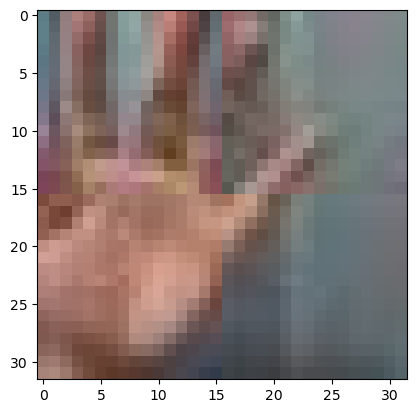

예측확률분포: [0.15371388 0.04353309 0.80275303]
라벨: 1, 예측결과: 2


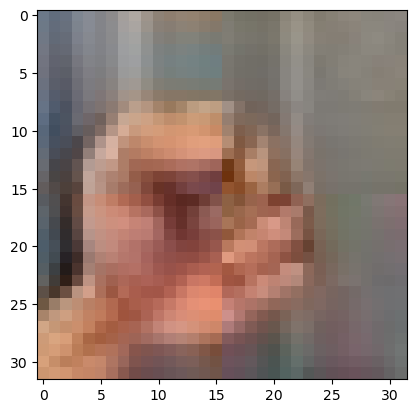

예측확률분포: [0.33410558 0.12432179 0.5415726 ]
라벨: 0, 예측결과: 2


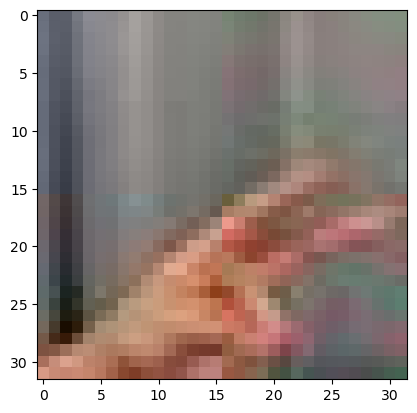

예측확률분포: [0.11577109 0.04758238 0.8366465 ]
라벨: 1, 예측결과: 2


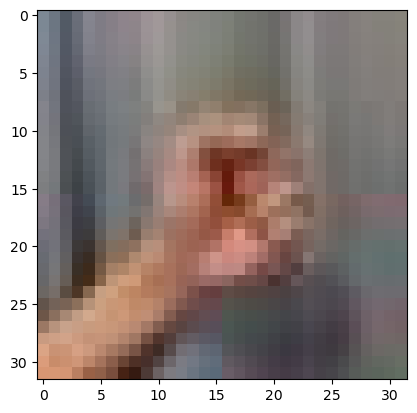

예측확률분포: [0.20893818 0.04344566 0.7476162 ]
라벨: 1, 예측결과: 2


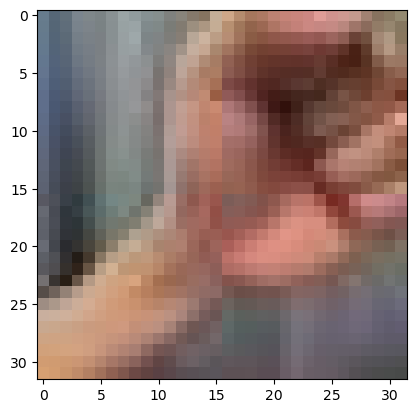

In [61]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()